In [1]:
import numpy as np
import matplotlib.pyplot as plt
from criticalZoom import order_checker

In [2]:
order=2

tmin=130
tmax=150
numtemp=25



#light quark mass
ml=24

#chemical potential
mu=270

lambda1= 7.8 #parameter for mixing between dilaton and chiral field

minsigma=0
maxsigma=350

a0=0. 

iterationNumber=0

#create a list to store the sigma values, temperatures, and order of the transition
sigma_list=[]
temps_list=[]
order_list=[]

#iteratively run the order_checker function until the transition is first order, or until the bounds are too small
while order==2 and iterationNumber<10 and tmin<tmax and maxsigma-minsigma>2:
    tmin,tmax,minsigma,maxsigma,order,temps,truesigma=order_checker(tmin,tmax,numtemp,minsigma,maxsigma,ml,mu,lambda1,a0)
    iterationNumber=iterationNumber+1
    print("Iteration number ", iterationNumber)
    if tmax<tmin:
        print("TEMPERATURE BOUNDS REVERSED!!!")
    sigma_list.append(truesigma)
    temps_list.append(temps)
    order_list.append(order)




get_all_sigmas_parallel took 3.966sec
Crossover or 2nd order
Pseudo-Critical temperature is between 138.33333333333334 140.83333333333334
Iteration number  1
get_all_sigmas_parallel took 51.372sec
Crossover or 2nd order
Pseudo-Critical temperature is between 139.6875 140.10416666666669
Iteration number  2
get_all_sigmas_parallel took 2.299sec
First order
Critical temperature is  139.9652777777778
Iteration number  3


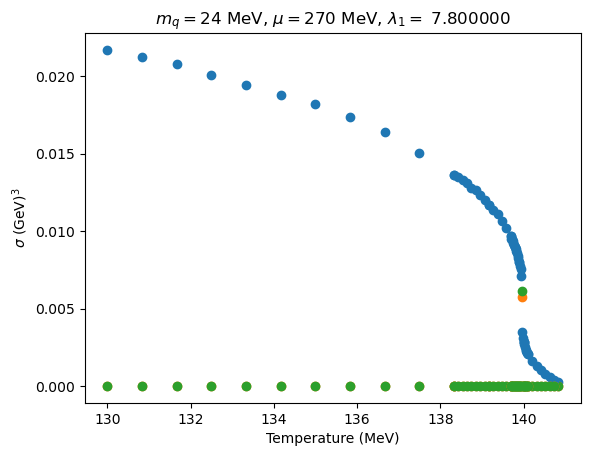

In [8]:
#plot all the sigma values for each iteration
#get the standard colors for matplotlib
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i in range(len(sigma_list)):
    plt.scatter(temps_list[i],(sigma_list[i][:,0]/1000)**3,color=colors[0])
    plt.scatter(temps_list[i],(sigma_list[i][:,1]/1000)**3,color=colors[1])
    plt.scatter(temps_list[i],(sigma_list[i][:,2]/1000)**3,color=colors[2])
plt.xlabel("Temperature (MeV)")
plt.ylabel("$\sigma$ (GeV)$^3$")
plt.title(r'$m_q=%i$ MeV, $\mu=%i$ MeV, $\lambda_1=$ %f' %(ml,mu,lambda1))
plt.show()
    

In [25]:
order_list

[2, 2, 1]

In [26]:
temps_list_flat=[item for sublist in temps_list for item in sublist]
sigma_list_flat=[item for sublist in sigma_list for item in sublist]
order_list_flat=[item for sublist in order_list for item in sublist]

TypeError: 'int' object is not iterable

array([[279.,   0.,   0.],
       [277.,   0.,   0.],
       [275.,   0.,   0.],
       [272.,   0.,   0.],
       [269.,   0.,   0.],
       [266.,   0.,   0.],
       [263.,   0.,   0.],
       [259.,   0.,   0.],
       [254.,   0.,   0.],
       [247.,   0.,   0.],
       [239.,   0.,   0.],
       [227.,   0.,   0.],
       [142.,   0.,   0.],
       [ 63.,   0.,   0.]])

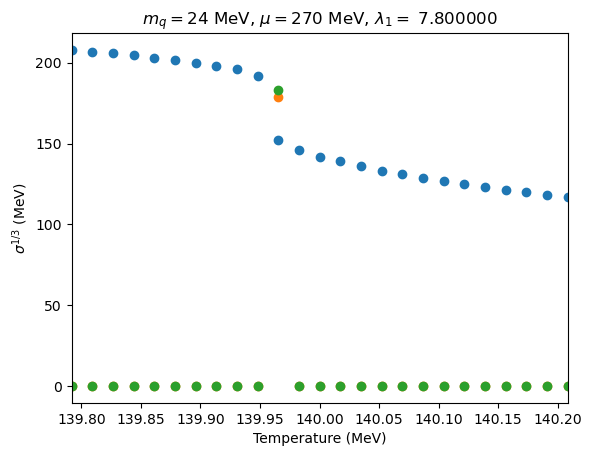

In [5]:
plt.scatter(temps,truesigma[:,0])
plt.scatter(temps,truesigma[:,1])
plt.scatter(temps,truesigma[:,2])
# plt.ylim([min(truesigma[:,0])-5,max(truesigma[:,0])+5])
plt.xlim(tmin,tmax)
plt.xlabel('Temperature (MeV)')
plt.ylabel(r'$\sigma^{1/3}$ (MeV)')
plt.title(r'$m_q=%i$ MeV, $\mu=%i$ MeV, $\lambda_1=$ %f' %(ml,mu,lambda1))
plt.show()